## Здравствуйте, меня зовут *Имя Фамилия*, вот моё Задание №1 по курсу ПСАД-2020!

In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import seaborn as sns
sns.set()

%matplotlib inline
%config InlineBackend.figure_format = 'svg' 

In [2]:
from scipy.stats import linregress

def draw_linear(x, y, x_name='', y_name=''):
    "Scatter x-y points and draw a LR line."
    slope, intercept, r, _, _ = linregress(x, y)
    x_lims = np.array([x.min() - 1, x.max() + 1])
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.plot(x, y, 'g+', label='Objects')
    plt.plot(x_lims, intercept + slope * x_lims, 'r--', label=r"LR line with $\rho \approx {:.3f}$".format(r))
    plt.legend()
    plt.show()

In [3]:
from sklearn.metrics import confusion_matrix

def draw_cm(x_bin, y_bin, x_name='', y_name=''):
    "Draw a confusion matrix for binary 1-D arrays x_bin and y_bin."
    cm = confusion_matrix(x_bin, y_bin)
    plt.matshow(cm)
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.colorbar()
    plt.grid(False)
    plt.show()

In [4]:
from itertools import combinations
from collections import defaultdict

def apply_pair_statistics(S, pair_statistics, statistics_names):
    """Apply pair statistics to each pair in a dataset S 
    and return a DataFrame containing the results.
    
    Parameters
    ----------
    S: array of shape (N, D)
        A dataset numpy array.
    pair_statistics: list of callables
        A list of statistics -- functions requiring two array arguments (x and y) 
        and returning a number (statistic's value)
    statistics_names: list of strings
        A list of statistics names.
    """
    res = defaultdict(list)

    for i, j in combinations(range(S.shape[1]), 2):
        x_name, y_name = f'X{i+1}', f'X{j+1}'
        x, y = S.T[i], S.T[j]
        res["Pair"].append(x_name + ' - ' + y_name)
        for statistic, name in zip(pair_statistics, statistics_names):
            res[name].append(statistic(x, y))

    res = pd.DataFrame(res)
    return res

## Итак...

Пусть задана обучающая выборка $\widetilde{S}$, включающая значения переменных $X_1, \dots, X_4$.

In [7]:
S = np.load('data', allow_pickle=True)

### Задача 1  

Вычислите для каждой пары переменных коэффициент корреляции Пирсона.

In [8]:
def pearson(x, y):
    "Calculate a Pearson correlation coefficient given 1-D data arrays x and y."
    # TODO: implement me!!!
    pass

res_pearson = apply_pair_statistics(S, [pearson], ['Pearson'])
res_pearson

,Pair,Pearson
0,X1 - X2,None
1,X1 - X3,None
2,X1 - X4,None
3,X2 - X3,None
4,X2 - X4,None
5,X3 - X4,None


Сопоставьте каждой из переменных  $X_1,\dots,X_4$  соответствующую порядковую переменную.

In [9]:
def rank(x):
    "Assign ranks to data and return the resulting ranking array."
    # TODO: implement me!!!
    pass

S_r = np.array([rank(x) for x in S.T]).T

Вычислите для каждой из пар переменных коэффициенты корреляции Спирмена и Кендалла ($\tau$-коэффициент).

In [ ]:
def spearman(x_r, y_r):
    "Calculate a Spearman correlation coefficient given 1-D ranking arrays x_r and y_r."
    # TODO: implement me!!!
    pass

def kendall(x_r, y_r):
    "Calculate a Kendall tau correlation coefficient given 1-D ranking arrays x_r and y_r."
    # TODO: implement me!!!
    pass

res_ranked = apply_pair_statistics(S_r, [spearman, kendall], ['Spearman', 'Kendall'])
res_ranked

Посмотрите на общую таблицу результатов и на графики ниже, сделайте выводы. 

При желании можно построить свои графики / вывести дополнительные результаты.

In [ ]:
res_final = pd.merge(res_pearson, res_ranked)
res_final

In [ ]:
draw_linear(S.T[0], S.T[1], 'X1', 'X2')
draw_linear(S.T[1], S.T[2], 'X2', 'X3')
draw_linear(S.T[2], S.T[3], 'X3', 'X4')

**Выводы:**

### Задача 2


Бинаризуйте выборку $\widetilde{S}$ по медиане.

In [ ]:
S_bin = None  # TODO: implement me!!!

Вычислите для каждой пары бинаризованных переменных коэффициенты близости Жаккарда и $\phi$.

In [ ]:
def jaccard(x_bin, y_bin):
    "Compute the Jaccard coefficient given 1-D boolean arrays x_bin and y_bin."
    # TODO: implement me!!!
    pass

def phi(x_bin, y_bin):
    "Compute the phi coefficient given 1-D boolean arrays x_bin and y_bin."
    # TODO: implement me!!!
    pass

res_bin = apply_pair_statistics(S_bin, [jaccard, phi], ['Jaccard', 'Phi'])
res_bin

Сделайте выводы по полученным результатам и приведённым ниже матрицам ошибок.

При желании можно построить свои графики / вывести дополнительные результаты.

In [ ]:
draw_cm(S_bin.T[0], S_bin.T[1], 'X1', 'X2')
draw_cm(S_bin.T[1], S_bin.T[2], 'X2', 'X3')
draw_cm(S_bin.T[2], S_bin.T[3], 'X3', 'X4')

**Выводы:**

### Задача 3

#### Продолжительность жизни крыс

В исследовании принимало участие 195 крыс. 106 из них держали на строгой диете, оставшиеся 89 — на диете ad libitum. Имеющиеся данные: продолжительность жизни крыс в каждой из групп. Влияет ли диета на продолжительность жизни?

In [26]:
rats = pd.read_table("rats.txt", sep="\t")
rats.sample(5)

,lifespan,diet
186,806,ad libitum
135,668,ad libitum
59,1070,restricted
94,1233,restricted
185,801,ad libitum


In [27]:
x1 = rats.loc[rats['diet'] == 'restricted']['lifespan']
x2 = rats.loc[rats['diet'] == 'ad libitum']['lifespan']

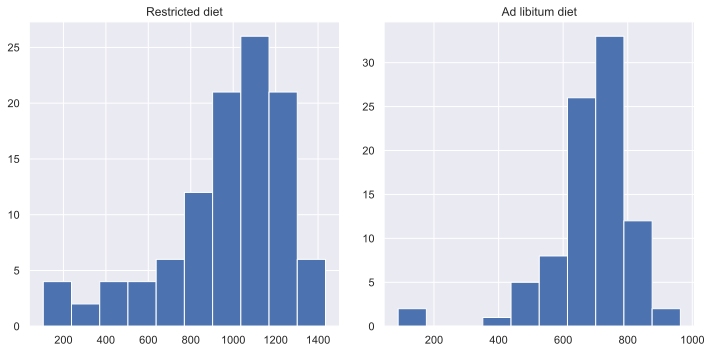

In [28]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('Restricted diet')
plt.hist(x1)
plt.subplot(1, 2, 2)
plt.title('Ad libitum diet')
plt.hist(x2)
plt.tight_layout()

1. Нарисуйте один график с двумя boxplot на нем (для каждой из диет). Укажите на графике 95% доверительный интервал для каждой из медиан. В этом вам поможет функция boxplot(..., notch=TRUE), которой первым аргументом можно передать объект типа формула.

### Нормальность

2. Проверим нормальность двух выборок (для каждой из диет). Для этого нарисуйте qq-график и отметьте на нем прямую линию, соответствующую идеальным теоретическим квантилям нормального распределения. Похожи ли данные на нормальное распределение?

3. Попробуйте исключить крыс, проживших меньше 400 дней (например, можно предположить, что смерть раньше этого срока вызывается причинами, не связанными с диетой) и снова нарисовать qq-графики. Можно ли применять к этим данным критерии, основанные на предположении о нормальности?

Усечённые выборки можно считать практически нормальными.

### Сравнение средних

Проверьте нулевую гипотезу

$H_0$: продолжительность жизни крыс не меняется при ограничении диеты.

против следующих альтернатив:

$H_1$: крысы на строгой диете живут дольше.

$H_1$: средняя продолжительность жизни крыс меняется при ограничении диеты. 

Проверить правильность вычислений вы можете с помощью библиотечной функции `scipy.stats.ttest_ind`, которая реализует двусторонний критерий Стьюдента для двух независимых выборок.